In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


file_path = 'penguins.csv'
penguins_data = pd.read_csv(file_path)


penguins_data_cleaned = penguins_data.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])


features = penguins_data_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=0)
penguins_data_cleaned['cluster'] = kmeans.fit_predict(features_scaled)

print("Cluster Centers (standardized values):\n", kmeans.cluster_centers_)
print("\nSample Data Points with Cluster Assignments:\n", penguins_data_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'cluster']].head())


Cluster Centers (standardized values):
 [[ 0.65722922 -1.09998045  1.15886506  1.0917612 ]
 [-0.95934906  0.53903456 -0.82995108 -0.7074585 ]
 [ 0.88719736  0.78544923 -0.26968131 -0.41250444]]

Sample Data Points with Cluster Assignments:
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  cluster
0            39.1           18.7              181.0       3750.0        1
1            39.5           17.4              186.0       3800.0        1
2            40.3           18.0              195.0       3250.0        1
4            36.7           19.3              193.0       3450.0        1
5            39.3           20.6              190.0       3650.0        1


<ipython-input-1-34f7014ebb20>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_data_cleaned['cluster'] = kmeans.fit_predict(features_scaled)


<ipython-input-2-5fce6094dbe1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_data_cleaned['cluster'] = kmeans.fit_predict(features_scaled)


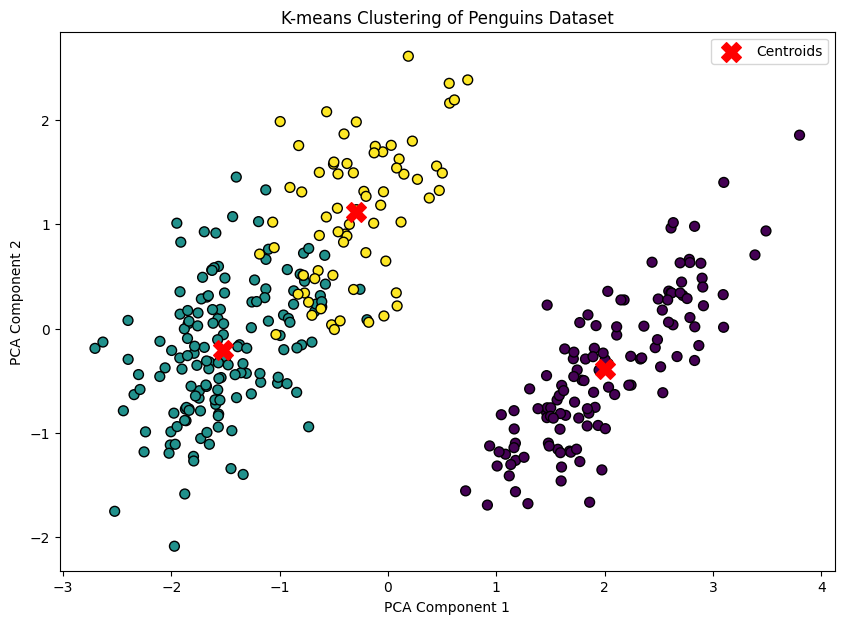

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'penguins.csv'
penguins_data = pd.read_csv(file_path)

# Drop rows with missing values in numeric columns
penguins_data_cleaned = penguins_data.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# Select relevant numeric features for clustering
features = penguins_data_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
penguins_data_cleaned['cluster'] = kmeans.fit_predict(features_scaled)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=penguins_data_cleaned['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of Penguins Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
